In [355]:
import pandas as pd 
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt

In [356]:
df = pd.read_csv('NYPD_Motor_Vehicle_Collisions.csv', index_col = 0, low_memory = False)

In [357]:
df.shape

(1149041, 28)

In [358]:
df.columns

Index(['TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION',
       'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'UNIQUE KEY', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5'],
      dtype='object')

In [359]:
df = df.dropna(subset = ['LOCATION'])

In [360]:
df.shape

(937672, 28)

In [361]:
df['VEHICLE TYPE CODE 1'] = df['VEHICLE TYPE CODE 1'].fillna('')
df['VEHICLE TYPE CODE 2'] = df['VEHICLE TYPE CODE 2'].fillna('')
df['VEHICLE TYPE CODE 3'] = df['VEHICLE TYPE CODE 3'].fillna('')
df['VEHICLE TYPE CODE 4'] = df['VEHICLE TYPE CODE 4'].fillna('')
df['VEHICLE TYPE CODE 5'] = df['VEHICLE TYPE CODE 5'].fillna('')

In [362]:
df['all_vehicle'] = list(map(lambda a,b,c,d,e: a + b + c + d + e, 
                             df['VEHICLE TYPE CODE 1'],
                            df['VEHICLE TYPE CODE 2'],
                            df['VEHICLE TYPE CODE 3'],
                            df['VEHICLE TYPE CODE 4'],
                            df['VEHICLE TYPE CODE 5']))

# Generate bike_involved indicator for filtering

In [363]:
df['bike_involved'] = list(map(lambda x: 'BICYCLE' in x, df['all_vehicle']))

In [364]:
df['CONTRIBUTING FACTOR VEHICLE 1'] = df['CONTRIBUTING FACTOR VEHICLE 1'].fillna('')
df['CONTRIBUTING FACTOR VEHICLE 2'] = df['CONTRIBUTING FACTOR VEHICLE 2'].fillna('')
df['CONTRIBUTING FACTOR VEHICLE 3'] = df['CONTRIBUTING FACTOR VEHICLE 3'].fillna('')
df['CONTRIBUTING FACTOR VEHICLE 4'] = df['CONTRIBUTING FACTOR VEHICLE 4'].fillna('')
df['CONTRIBUTING FACTOR VEHICLE 5'] = df['CONTRIBUTING FACTOR VEHICLE 5'].fillna('')

In [365]:
df['all_factors'] = list(map(lambda a,b,c,d,e: a +" " + b + " " +c + " " + d + " " + e, 
                             df['CONTRIBUTING FACTOR VEHICLE 1'],
                            df['CONTRIBUTING FACTOR VEHICLE 2'],
                            df['CONTRIBUTING FACTOR VEHICLE 3'],
                            df['CONTRIBUTING FACTOR VEHICLE 4'],
                            df['CONTRIBUTING FACTOR VEHICLE 5']))

In [366]:
factors = {'physical_condition': ['Fatigued/Drowsy', 'Fell Asleep', 
                                  'Illness',  'Lost Consciousness', 
                                  'Physical Disability',  'Prescription Medication',  
                                  'Alcohol Involvement','Drugs (Illegal)'], 
           
           'car_condition': ['Accelerator Defective',
                             'Brakes Defective', 'Headlights Defective',
                             'Steering Failure', 'Tow Hitch Defective', 
                             'Windshield Inadequate',
                             'Tire Failure/Inadequate', 'Other Vehicular', 'View Obstructed/Limited'],
           
           'road_condition': ['Lane Marking Improper/Inadequate','Obstruction/Debris', 
                              'Other Lighting Defects', 'Pavement Defective', 
                              'Pavement Slippery', 'Shoulders Defective/Improper',
                              'Traffic Control Device Improper/Non-Working', 
                              'Driverless/Runaway Vehicle', 'Animals Action'], 
           
           'behavoral': ['Aggressive Driving/Road Rage', 'Backing Unsafely',
                                   'Cell Phone (hand-held)', 'Cell Phone (hands-free)', 
                                   'Driver Inattention/Distraction',  
                                   'Driver Inexperience', 'Failure to Keep Right',
                                   'Failure to Yield Right-of-Way','Following Too Closely', 
                                   'Other Electronic Device', 'Outside Car Distraction',
                                   'Oversized Vehicle', 'Passenger Distraction', 
                                   'Passing or Lane Usage Improper', 
                                   'Reaction to Other Uninvolved Vehicle', 
                                   'Traffic Control Disregarded', 'Turning Improperly', 
                                   'Unsafe Lane Changing', 'Unsafe Speed', 
                            'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion'], 
           
           'other': ['Unspecified'] 

          }


In [367]:
def matching(category, strings):
    category_list = factors[category]
    bool_list = list(map(lambda x: x in strings, category_list))
    score = sum(bool_list)
    return(int(score != 0))

# Generate dummy variables for different factors

In [368]:
df['physical_condition'] = 0
df['car_condition'] = 0
df['road_condition'] = 0
df['behavoral'] = 0
df['other'] = 0

In [369]:
df['physical_condition'] = list(map(lambda x: matching('physical_condition', x), df.all_factors))
df['car_condition'] = list(map(lambda x: matching('car_condition', x), df.all_factors))
df['road_condition'] = list(map(lambda x: matching('road_condition', x), df.all_factors))
df['behavoral'] = list(map(lambda x: matching('behavoral', x), df.all_factors))
df['other'] = list(map(lambda x: matching('other', x), df.all_factors))

# Generate summary plots

In [370]:
df = df[df.bike_involved == 1]

In [377]:
df.shape

(25725, 40)

In [371]:
df['hour'] = list(map(lambda x: int(x.split(':')[0]), df.TIME))

In [372]:
df['month'] = list(map(lambda x: int(x.split('/')[0]), df.index)) 
df['day'] = list(map(lambda x: int(x.split('/')[1]), df.index)) 
df['year'] = list(map(lambda x: int(x.split('/')[2]), df.index)) 

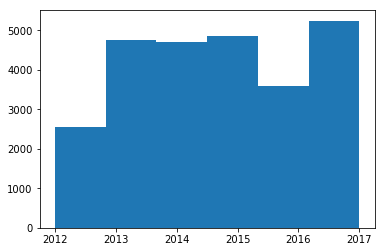

In [385]:
plt.hist(df.year, bins = 6)
plt.show()

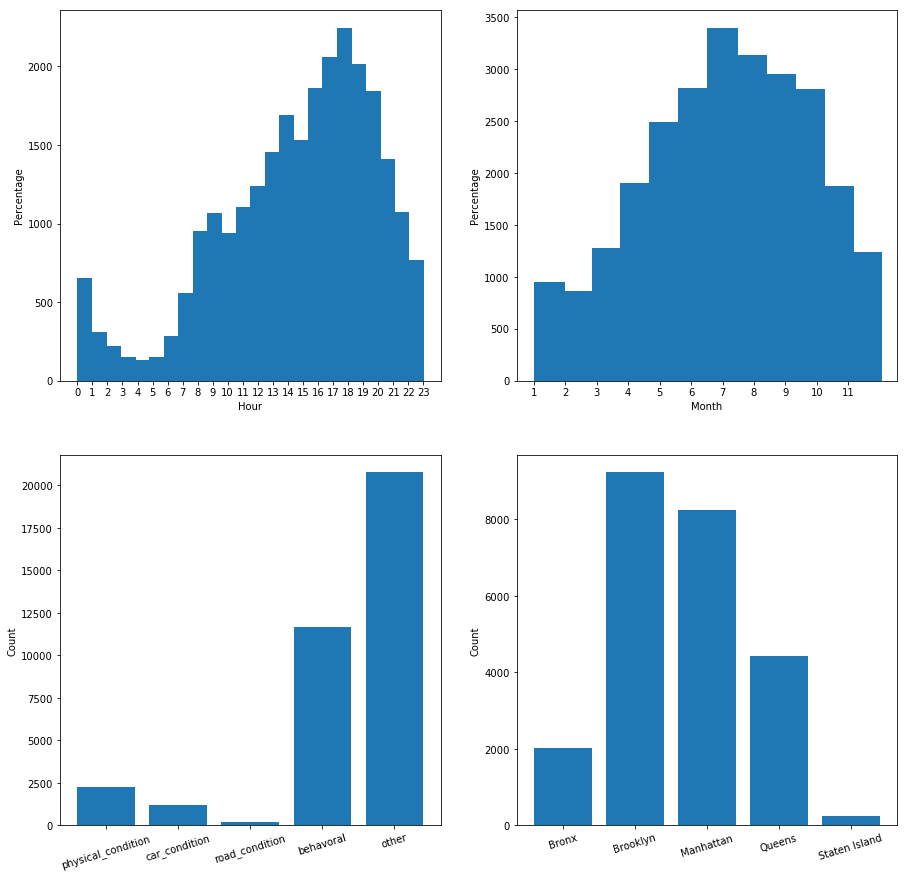

In [384]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
ax0, ax1, ax2, ax3 = axes.flatten()

ax0.hist(df.hour, bins = 24, width = 1)
ax0.set_xticks(np.arange(0, 24))
ax0.set_xlabel('Hour')
ax0.set_ylabel('Percentage')

ax1.hist(df.month, bins = 12, width = 1)
ax1.set_xticks(np.arange(1, 12))
ax1.set_xlabel('Month')
ax1.set_ylabel('Percentage')

x = ('physical_condition','car_condition','road_condition','behavoral','other')
y = [sum(df.physical_condition), sum(df.car_condition), sum(df.road_condition), sum(df.behavoral), sum(df.other)]
ax2.bar(np.arange(5), y)
ax2.set_xticks(np.arange(5))
ax2.set_xticklabels(x, rotation = 17)
ax2.set_ylabel('Count')

x1 = ('Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island')
ax3.bar(np.arange(5), df.groupby(['BOROUGH'])['BOROUGH'].count())
ax3.set_xticks(np.arange(5))
ax3.set_xticklabels(x1, rotation = 17)
ax3.set_ylabel('Count')

#fig.savefig('summary_plots.png')
plt.show()

In [376]:
df[['NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
    'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
    'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
    'physical_condition', 'car_condition', 
    'road_condition', 'behavoral', 'other']].describe().round(3)

,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,physical_condition,car_condition,road_condition,behavoral,other
count,25725.000,25725.000,25725.000,25725.000,25725.000,25725.000,25725.000,25725.000,25725.000,25725.000,25725.000
mean,0.018,0.000,0.771,0.003,0.015,0.000,0.088,0.046,0.007,0.454,0.807
std,0.139,0.006,0.444,0.053,0.147,0.009,0.283,0.210,0.085,0.498,0.394
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
50%,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
75%,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
max,3.000,1.000,4.000,1.000,6.000,1.000,1.000,1.000,1.000,1.000,1.000
